# Task4: Explore Decision Tree Algorithm
In this task we create the Decision Tree Classifier for the Iris dataset, visualize it graphically, feed the new data and predict to which species class it belongs to.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

### Import Dataset using Pandas

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Explore the data 

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

### Visualize the data 

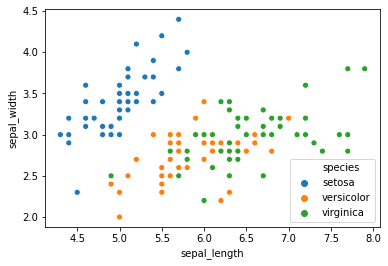

In [9]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='species')

### Preparing the data 

In [10]:
Y=data['species'].values
X=data[['sepal_length','sepal_width','petal_length','petal_width']].values

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

### Training the Decision Tree Classifier model on the Training Set

In [12]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
print("Decision Tree Created")

Decision Tree Created


In [13]:
Y_pred=dtree.predict(X_test)

### Check the Accuracy 

In [14]:
accuracy=accuracy_score(Y_test,Y_pred)
print('Accuracy: {:.3f}%'.format(accuracy*100))

Accuracy: 96.667%


### Cross Validation 

In [15]:
acc=cross_val_score(estimator=dtree,X=X_train,y=Y_train,cv=10)
print('Mean:{:.2f}% '.format(acc.mean()*100))
print('Std: {:.2f}% '.format(acc.std()*100))

Mean:95.83% 
Std: 4.17% 


### Visualisation of Decision Tree 

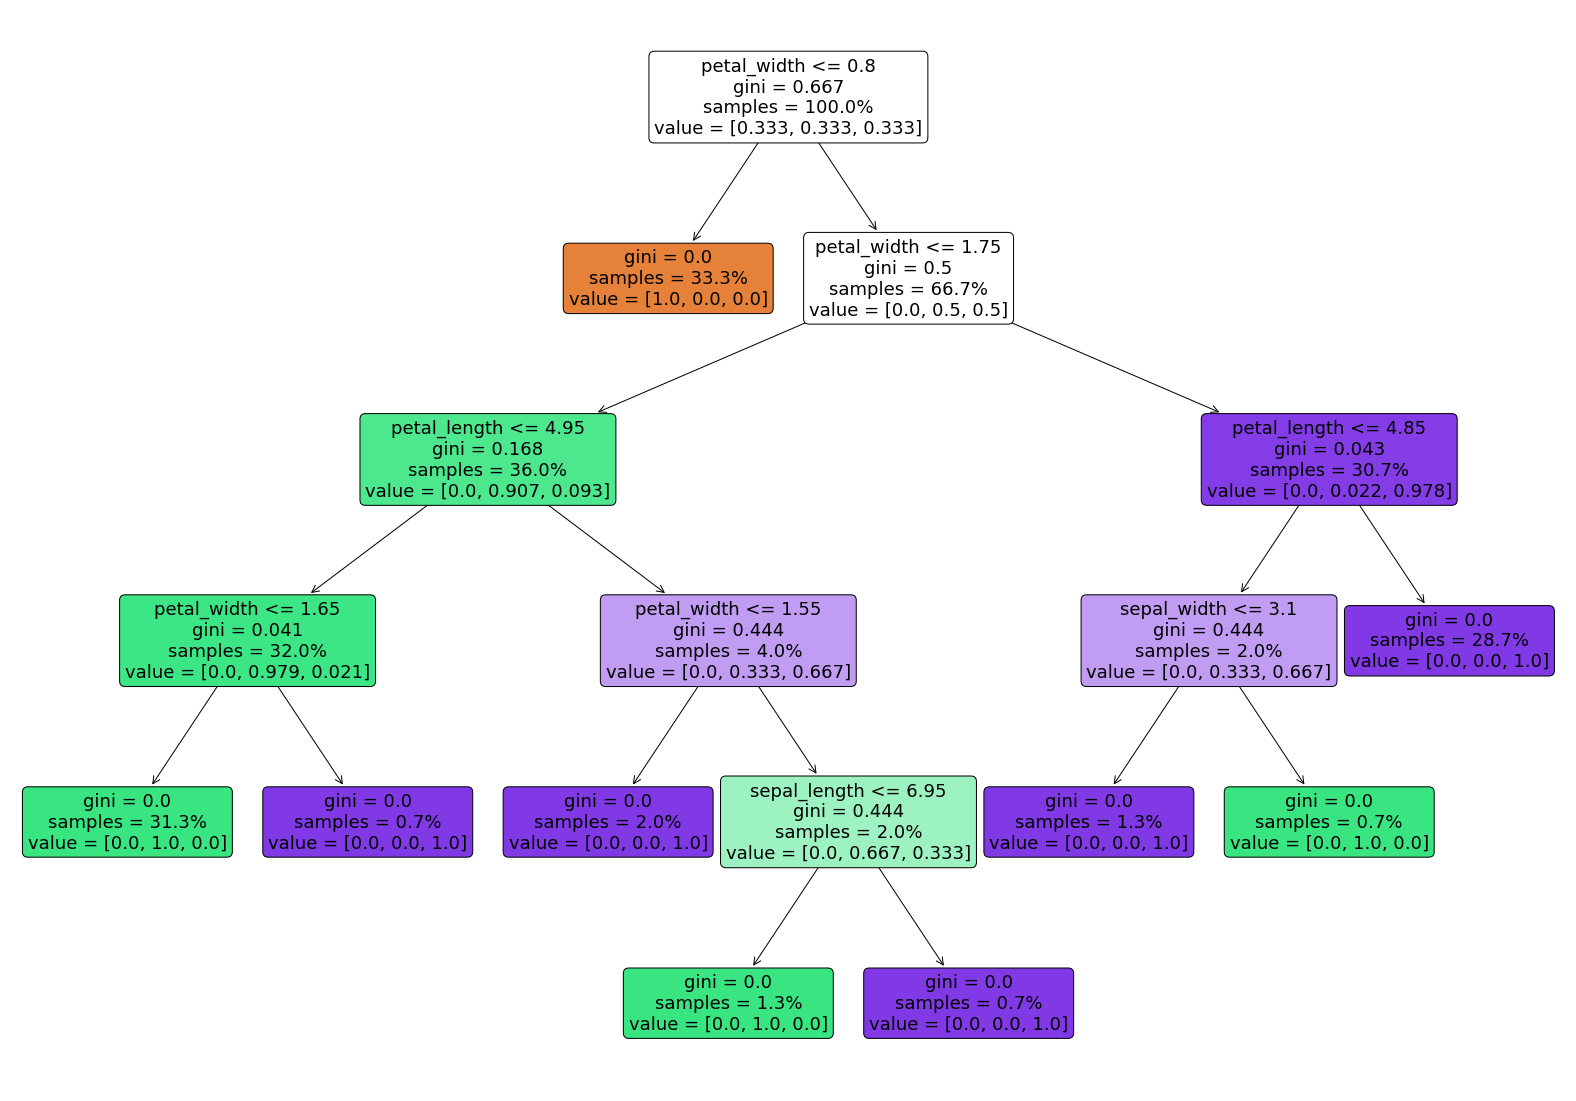

In [16]:
feature_columns=['sepal_length','sepal_width','petal_length','petal_width']
plt.figure(figsize=(28,20))
tree.plot_tree(dtree.fit(X,Y),feature_names=feature_columns,filled=True,precision=3,proportion=True,rounded=True,fontsize=18)
plt.show()

# Conclusion
As we can see that the accuracy of Decision Tree Classifier model is 96.66% and Deviation is 4.17% we can conclude that this model produces better output with tuned hyperparameters.

### Let us feed new data to this classifier and check whether it predicts the right species class.

In [17]:
# Imagine that we obtained a new iris 
X_new = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape)

(1, 4)


In [18]:
# We can use the predict function to use our model to offer a prediction as to
# what species our X_new corresponds to.
prediction = dtree.predict(X_new)
print(prediction)

['setosa']
